In [1]:
#知识点：
#1、修改索引值
#2、设坐标轴名称、字体、大小
#3、使用pivot_table，形成数据透视表
#4、绘制对照图

In [2]:
import  pandas as pd
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties  

In [3]:
df_new=pd.read_excel("D:/2022_py_code/chap2数据/03_newDate.xlsx",sheet_name='Sheet1',index_col=0)

In [4]:
df_new.index=df_new['date']#将索引值修改为日期

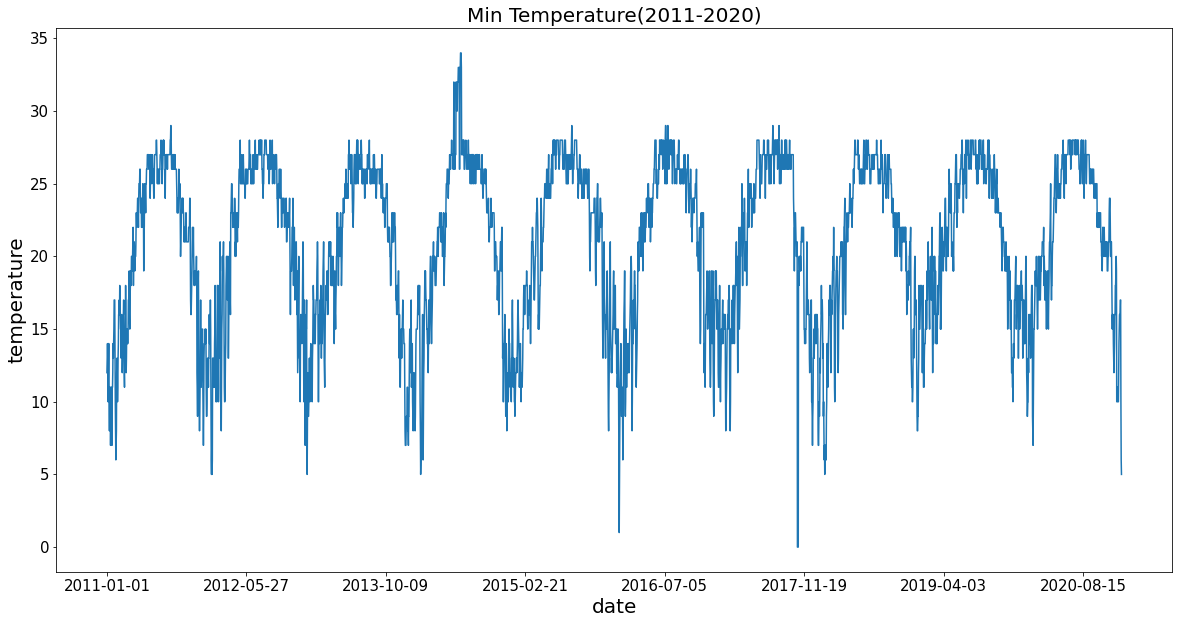

In [5]:
#对minTem进行绘图，
#fig = plt.figure(figsize=(a, b), dpi=dpi)
#figsize 设置图形的大小，a 为图形的宽， b 为图形的高，dpi 为设置图形每英寸的点数
df_new['minTem'].plot(figsize=(20,10))

#为x轴和y轴设置名称
plt.xlabel('date',fontsize=20)
plt.ylabel('temperature',fontsize=20)

#为图片设置标题
plt.title('Min Temperature(2011-2020)',fontsize=20)

#参数labelsize用于设置刻度线标签的字体大小
plt.tick_params(labelsize=15)
plt.show()

In [6]:
df_year=df_new['date'].str.split('-',1,expand=True)
#对日期进行根据-分列1次

In [7]:
df_year_month=df_year.rename(columns={0:'year',1:'month-day'})
#给分开的两列分别重命名

In [8]:
df2=pd.concat([df_new,df_year_month],axis=1)
#将各个数据帧连接起来，水平连接

In [9]:
print(df2.head(5))

                  date  maxTem  minTem weather wind_direction wind_speed  \
date                                                                       
2011-01-01  2011-01-01      20      12       晴          无持续风向         微风   
2011-01-02  2011-01-02      22      13      多云          无持续风向         微风   
2011-01-03  2011-01-03      22      14      多云          无持续风向         微风   
2011-01-04  2011-01-04      23      13      多云      无持续风向~东北风    微风~3-4级   
2011-01-05  2011-01-05      19      10    阴~多云            东北风       3-4级   

            year month-day  
date                        
2011-01-01  2011     01-01  
2011-01-02  2011     01-02  
2011-01-03  2011     01-03  
2011-01-04  2011     01-04  
2011-01-05  2011     01-05  


In [10]:
df3=pd.pivot_table(df2,index='month-day',values='minTem',columns='year')
#pivot_table相当于数据透视表
#Values可以对需要的计算数据进行筛选
#Index就是层次字段，要通过透视表获取什么信息就按照相应的顺序设置字段
#Columns类似Index可以设置列层次字段，它不是一个必要参数，作为一种分割数据的可选方式

In [11]:
print(df3.head(5))

year       2011  2012  2013  2014  2015  2016  2017  2018  2019  2020
month-day                                                            
01-01      12.0  14.0   8.0  12.0  11.0  15.0  17.0  14.0   9.0  15.0
01-02      13.0  15.0  12.0  14.0  10.0  16.0  17.0  16.0   9.0  16.0
01-03      14.0  11.0  12.0  15.0  13.0  18.0  19.0  16.0  12.0  16.0
01-04      13.0   9.0   9.0  13.0  13.0  19.0  18.0  16.0  13.0  17.0
01-05      10.0   9.0   9.0  12.0  16.0  15.0  19.0  16.0  18.0  17.0


In [12]:
#参考博客：https://www.cnblogs.com/Yanjy-OnlyOne/p/11195621.html

In [13]:
df3.to_excel('D:/2022_py_code/chap2数据/04_yearData.xlsx')
#把它存储为一个新文件

In [14]:
myfont=FontProperties(fname="C:/Windows/Fonts/StFANGSO.TTF",size=25)
#此处需要包一个库from matplotlib.font_manager import FontProperties
#将字体设置成了仿宋

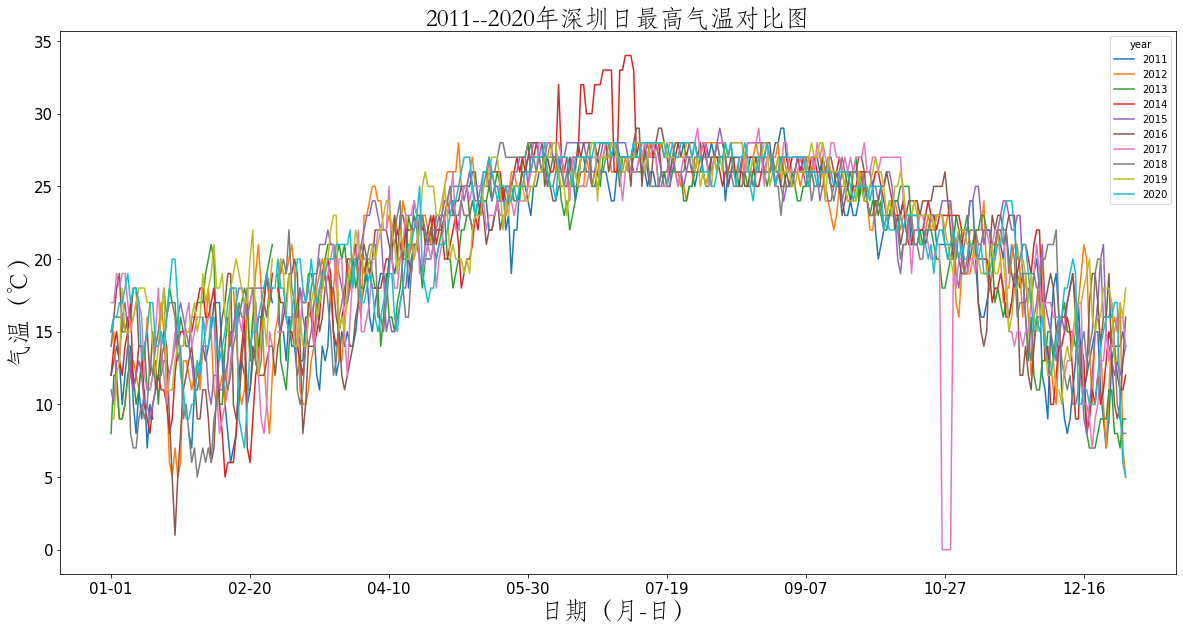

In [15]:
df3.plot(figsize=(20,10),fontsize=15)
plt.xlabel("日期（月-日）",fontproperties=myfont)
plt.ylabel("气温（℃）",fontproperties=myfont)
plt.title("2011--2020年深圳日最高气温对比图",fontproperties=myfont)
plt.show()